In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from docx import Document
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd
import re

In [33]:
def parse_numbered_list(text):

    if not isinstance(text, str):
        return []

    items = [match.group(1).strip() for match in re.finditer(r"^\s*\d+\.\s*(?:\d+\.\s*)?(.+)$", text, re.MULTILINE) if match.group(1).strip()]
    return items

In [66]:
def docx_to_df(docx_file):
     document = Document(docx_file)
     tables = document.tables
     if len(tables) == 0:
         return None

     data = []
     for table in tables:
         for row in table.rows:
             row_data = [cell.text for cell in row.cells]
             data.append(row_data)

     df = pd.DataFrame(data)
     return df

docx_file = "data/data.docx"  #
df = docx_to_df(docx_file)


In [42]:

all_achievements = []
for lst in df[4].apply(parse_numbered_list):
    all_achievements.extend(lst)
print(f'Число достижений: {len(all_achievements)}')
documents = all_achievements
vectorizer = TfidfVectorizer(stop_words=['russian'])
X = vectorizer.fit_transform(documents)

Число достижений: 1747


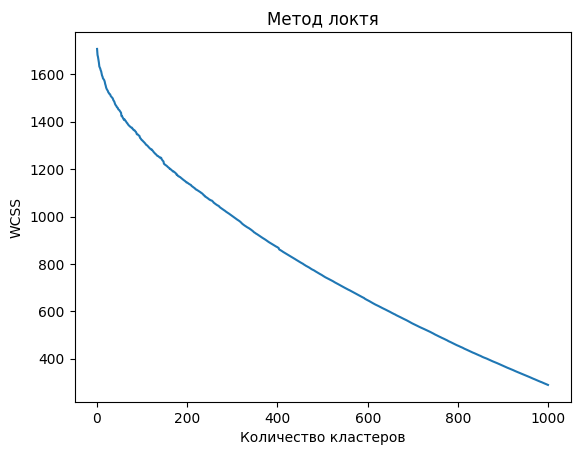

In [65]:
#Kmeans

wcss = []
k = 1000
for i in range(1, min(k, len(documents))):
    kmeans = KMeans(n_clusters=i,  max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ атрибут содержит WCSS

# Построение графика метода локтя
plt.plot(range(1, min(k, len(documents))), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()


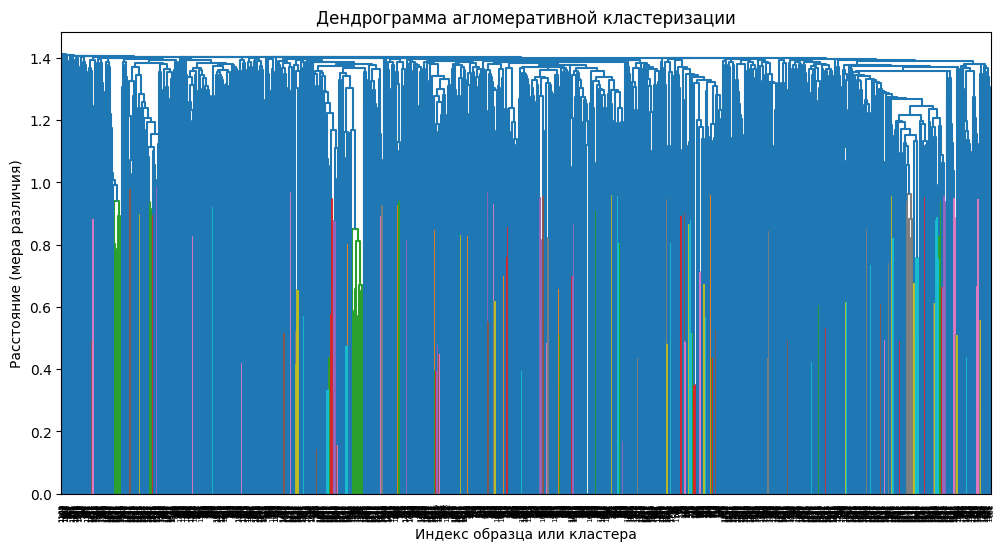

In [61]:
#Алгомеративная кластеризация
cluster = AgglomerativeClustering(n_clusters=10, linkage='average', compute_distances=True)
cluster.fit(X.toarray())
labels = cluster.labels_
linked = linkage(X.toarray(), method='average')

# Теперь строим дендрограмму с использованием вычисленной матрицы связей
plt.figure(figsize=(12, 6))
dendrogram(linked,
            orientation='top',
            distance_sort='ascending',
            show_leaf_counts=True,
            truncate_mode=None)

plt.title('Дендрограмма агломеративной кластеризации')
plt.xlabel('Индекс образца или кластера')
plt.ylabel('Расстояние (мера различия)')
plt.show()



In [16]:
pca = PCA(n_components=3)
reduced_X = pca.fit_transform(X.toarray())

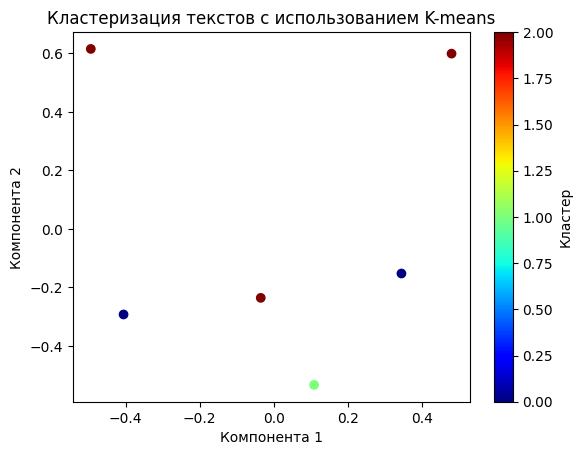

In [17]:
plt.scatter(reduced_X[:, 2], reduced_X[:, 1], c=labels, cmap='jet')
plt.title('Кластеризация текстов с использованием K-means')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.colorbar(label='Кластер')
plt.show()